In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
# Load NLTK stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read the dataset
#https://www.kaggle.com/datasets/siddharthtyagi/news-headlines-dataset-for-stock-sentiment-analyze
df = pd.read_csv(fr"Stock_Dataa.csv",encoding="iso-8859-1")


In [ ]:
df.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [ ]:
df.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [ ]:
#divide data set into train and test
train=df[df['Date'] < '20150101']
test=df[df['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]


Train size: (3975, 27), Test size: (378, 27)


In [ ]:
# Clean the data
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

new_columns = [i for i in range(0, 24)]
train.columns = new_columns
test.columns = new_columns

for i in new_columns:
    if train[i].dtype == 'object':
        train[i] = train[i].str.lower()
    if test[i].dtype == 'object':
        test[i] = test[i].str.lower()

#train_headlines = []
#test_headlines = []

In [ ]:
train_headlines = []
for i in range(0, train.shape[0]):
    train_headlines.append(' '.join(str(x) for x in train.iloc[i, 0:25]))

test_headlines = []
for i in range(0, test.shape[0]):
    test_headlines.append(' '.join(str(x) for x in test.iloc[i, 0:25]))


In [ ]:
# Clean headlines
train_corpus = []
test_corpus = []

# Move the stopwords loading outside the loop
stop_words = set(stopwords.words('english'))

In [ ]:
for i in range(0, len(train_headlines)):
    words = train_headlines[i].split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    headline = ' '.join(words)
    train_corpus.append(headline)


In [ ]:
for i in range(0, len(test_headlines)):
    words = test_headlines[i].split()
    #words = [word for word in words if word not in stop_words]
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    headline = ' '.join(words)
    test_corpus.append(headline)

In [ ]:
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()


In [ ]:
#Model training
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
#lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

Logistic Regression Model Evaluation:
Accuracy score is: 84.92%
Precision score is: 0.86
Recall score is: 0.84

Confusion Matrix:
[[160  26]
 [ 31 161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       186
           1       0.86      0.84      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



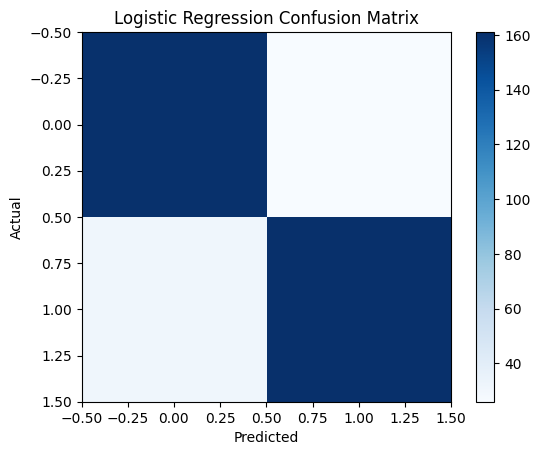

In [ ]:
#Model evaluation
score1lr = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("Logistic Regression Model Evaluation:")
print("Accuracy score is: {}%".format(round(score1lr * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

plt.imshow(confusion_matrix(y_test, lr_y_pred), interpolation='nearest', cmap=plt.cm.Blues)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Random Forest Model Evaluation:
Accuracy score is: 83.86%
Precision score is: 0.83
Recall score is: 0.86

Confusion Matrix:
[[152  34]
 [ 27 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       186
           1       0.83      0.86      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



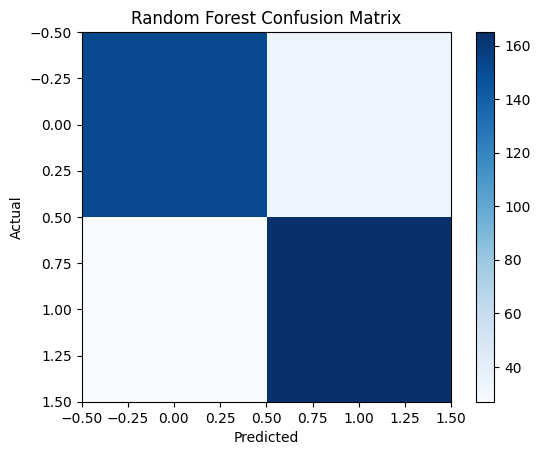

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

score1rf = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)

print("\nRandom Forest Model Evaluation:")
print("Accuracy score is: {}%".format(round(score1rf * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
plt.imshow(confusion_matrix(y_test, rf_y_pred), interpolation='nearest', cmap=plt.cm.Blues)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Model Evaluation:
Accuracy score is: 83.6%
Precision score is: 0.84
Recall score is: 0.83

Confusion Matrix:
[[156  30]
 [ 32 160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       186
           1       0.84      0.83      0.84       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



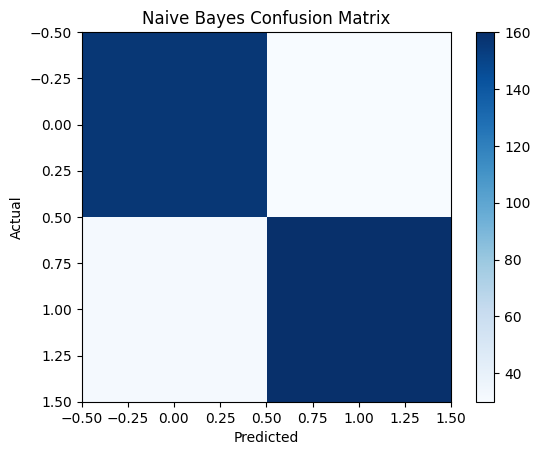

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

score1nb = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)

print("\nNaive Bayes Model Evaluation:")
print("Accuracy score is: {}%".format(round(score1nb * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, nb_y_pred))
plt.imshow(confusion_matrix(y_test, nb_y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Model Evaluation:
Accuracy score is: 84.66%
Precision score is: 0.86
Recall score is: 0.83

Confusion Matrix:
[[161  25]
 [ 33 159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       186
           1       0.86      0.83      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



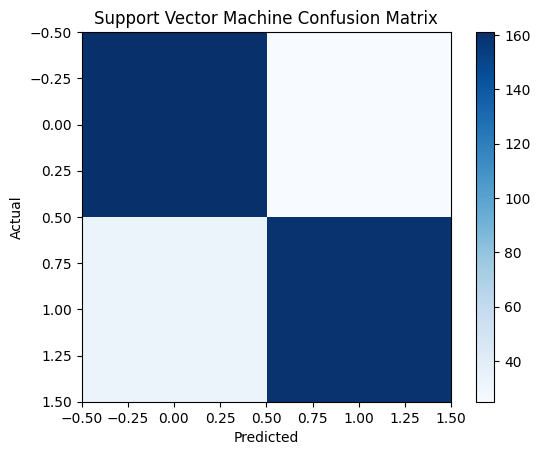

In [ ]:
#SVM Model training
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

score1svm = accuracy_score(y_test, svm_y_pred)
score2 = precision_score(y_test, svm_y_pred)
score3 = recall_score(y_test, svm_y_pred)

print("\nSVM Model Evaluation:")
print("Accuracy score is: {}%".format(round(score1svm * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, svm_y_pred))
plt.imshow(confusion_matrix(y_test, svm_y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Support Vector Machine Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

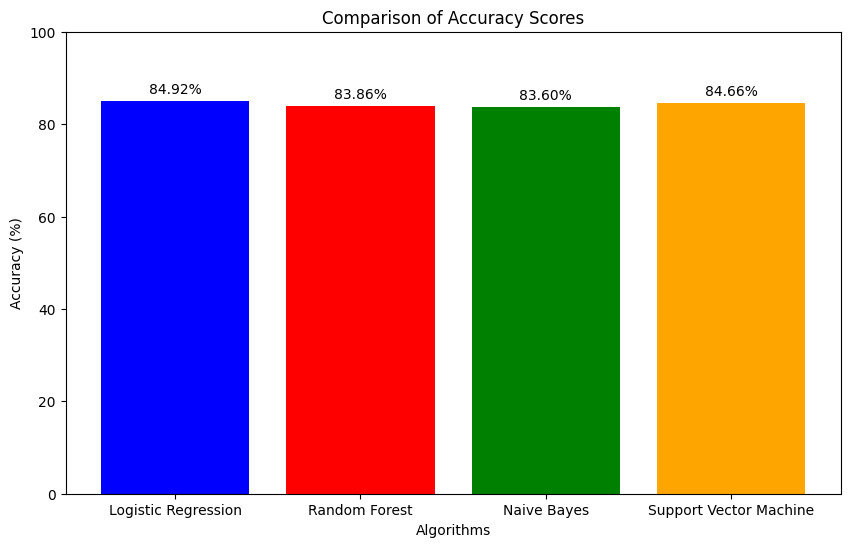

In [ ]:
# Compare accuracy of the models
accuracy_scores = [score1lr*100, score1rf*100, score1nb*100, score1svm*100]
algorithms = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Support Vector Machine']

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color=['blue','red', 'green', 'orange'])
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])

# Display the accuracy scores on each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
#sample_news = "continental and united airlines to join"
def stock_prediction(sample_news):
    sample_news = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)
    print (final_news)
    temp = cv.transform([final_news]).toarray()

    #return lr_classifier.predict(temp)
    return rf_classifier.predict(temp)
    #return nb_classifier.predict(temp)
    #return svm_classifier.predict(temp)

In [ ]:
sample_test = df[df['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']
row = random.randint(0, sample_test.shape[0] - 1)
sample_news = sample_test[row]
#sample_news = "Home loans interests reduced by the government"
print('\nNews: {}'.format(sample_news))
if stock_prediction(sample_news):
      print('Prediction: The stock price will remain the same or will go down.')
else:
      print('Prediction: The stock price will go up!')


News: Isis shuts down all women's clinics, threatens male gynaecologists with death
isi shut women clinic threaten male gynaecologist death
Prediction: The stock price will remain the same or will go down.
